# Math 450 Homework 4
# Geometric Optics, Probability modeling


## Hongshuo Wang


## 1. The parabolic solutions of the mirror equation can be derived directly using coordinate geometry if one postulates “Huygens’ principle”. Suppose a flash of light is emitted from the origin and reflected off a mirror so that all light rays travel straight up. Under Huygen’s principle, all light rays travel at the same speed, and all light rays reflected off the mirror will reach a horizontal line above the focus at the same time. If the bottom of the mirror is 12 centimeters below the origin, use coordinate geometry to find an equation for the mirror.

<img src="hw4.1.jpg" alt="Drawing" style="width: 1000px;"/>

Given that OF = 12 cm and let $v_{l}$ = velocity of light and A = (x, y) where A is the point on mirror

By the Huygen's priciple, all the light start at origin then it should return y = 0 at the same time.

$$\Longrightarrow \frac{2OF}{v_{l}} = \frac{(OA + AB)}{v_{l}} = \frac{24}{v_{l}}$$

$$\Longrightarrow OA + AB = 24$$

Final solution: $$ \sqrt{x^{2} + y^{2}} + |y| = 24 $$  

## 2. Polish natural philosopher Vitello measured refraction angles experimentally in the 13th century. A close approximation of Vitello’s data (in Exercise 4 in the “Geometric optics” lecture)
relating angle of incidence to angle of refraction for light passing from air to glass is given
below.


<img src="hw4.2.jpg" alt="Drawing" style="width: 1000px;"/>

(a).  Use least squares to fit a curve of the form $$ θ2 = a_{1}θ_{1} + a_{3}θ_{1}^{3} $$ to Vitello’s data.

In [1]:
from numpy import *
from scipy import linalg, random, integrate
from matplotlib.pyplot import *

In [2]:
datafile='vitello.csv'
data = loadtxt(datafile,delimiter=',',comments='#')
data

array([[79.97, 42.11],
       [70.07, 38.58],
       [60.17, 34.56],
       [50.12, 30.04],
       [40.07, 25.04],
       [30.02, 19.54],
       [20.11, 13.54],
       [10.05,  7.06],
       [ 0.  ,  0.  ]])

In [3]:
t_2 = data[:,1].reshape(-1,1)
t_2

array([[42.11],
       [38.58],
       [34.56],
       [30.04],
       [25.04],
       [19.54],
       [13.54],
       [ 7.06],
       [ 0.  ]])

In [4]:
t_1 = data[:,0].reshape(-1,1)
t_1

array([[79.97],
       [70.07],
       [60.17],
       [50.12],
       [40.07],
       [30.02],
       [20.11],
       [10.05],
       [ 0.  ]])

In [5]:
A = hstack([t_1, power(t_1,3)])
A

array([[7.99700000e+01, 5.11424216e+05],
       [7.00700000e+01, 3.44030029e+05],
       [6.01700000e+01, 2.17841207e+05],
       [5.01200000e+01, 1.25902162e+05],
       [4.00700000e+01, 6.43365883e+04],
       [3.00200000e+01, 2.70540360e+04],
       [2.01100000e+01, 8.13272733e+03],
       [1.00500000e+01, 1.01507513e+03],
       [0.00000000e+00, 0.00000000e+00]])

In [6]:
result, residuals, rank, svs = linalg.lstsq(A, t_2)
for i in range(len(result)):
    print(f'a{i+1} = {result[i]}\n')
print(f"Final result: t_2 = {around(result[0][0],5)} t_1 + {around(result[1][0],5)} t_1^3")

a1 = [0.65863725]

a2 = [-2.13647899e-05]

Final result: t_2 = 0.65864 t_1 + -2e-05 t_1^3


(b) Solve Snell's Law (see lecture notes) for the angle of refraction $\theta_{2}$ as a function of the
angle of incidence $\theta_{1}$, and calculate the McLaurin series this function to fourth order.

According to Snell's Law,

$$\frac{sin\theta_{1}}{v_{1}} = \frac{sin\theta_{2}}{v_{2}}$$
where v1 is the velocity of light in air and v2 is the velocity of light in glass. 
Moreover $\theta_{1}$ is the angle of incidence (deg) and $\theta_{2}$ is the angle of refraction (deg)

$$\Longrightarrow \theta_{2} = f(\theta_{1}) = arcsin(\frac{v2}{v2}sin(\theta_{1}))$$

let v2/v2 = k

$$f(\theta_{1}) = arcsin(ksin(\theta_{1})$$

Take the differivative:

1. $$f' = \dfrac{k\cos\left(x\right)}{\sqrt{1-k^2\sin^2\left(x\right)}} $$

2. $$f'' = \dfrac{k^3\sin^3\left(x\right)+\left(k^3\cos^2\left(x\right)-k\right)\sin\left(x\right)}{\left(1-k^2\sin^2\left(x\right)\right)^\frac{3}{2}}$$

3. $$f''' = \dfrac{k\cos\left(x\right)\left(k^2\sin^2\left(x\right)+k^2\cos^2\left(x\right)-1\right)\left(2k^2\sin^2\left(x\right)+1\right)}{\left(1-k^2\sin^2\left(x\right)\right)^\frac{5}{2}}$$

4. $$f'''' = \dfrac{k\sin\left(x\right)\left(k^2\sin^2\left(x\right)+k^2\cos^2\left(x\right)-1\right)\left(2k^4\sin^4\left(x\right)+\left(6k^4\cos^2\left(x\right)-k^2\right)\sin^2\left(x\right)+9k^2\cos^2\left(x\right)-1\right)}{\left(1-k^2\sin^2\left(x\right)\right)^\frac{7}{2}}$$




Take root (plugging into theta = 0)

1. f(0) = 0

2. f'(0) = k

3. f''(0) = 0

4. f'''(0) = k(k^2 - 1) = k^3 - k

5. f''''(0) = 0



$$f(\theta) = f(0) + f'(0)\theta + \frac{f''(\theta)}{2!}\theta^{2} + \frac{f'''(\theta)}{3!}\theta^{3} + \frac{f''''(\theta)}{4!}\theta^{4} + ...$$ 

$$\Longrightarrow = 0 + k\theta + 0 + \frac{k^{3}-k}{3!}\theta^{3} $$ (4th order)

$$\theta_{2} = f(\theta_{1}) = k\theta + \frac{k^{3}-k}{3!}\theta^{3}$$

(c) Using your previous results, estimate the refractive index of glass relative to air. Explain
your reasoning.

According to previous calculation of a0 and a1, 

we can naturally comes out the two equations:

1. $k = a1 = \frac{v2}{v1}$ 

2. $\frac{k^{3}-k}{3!} = a3$ (a2 = a3)

In [7]:
print(f'v2/v1 = k = a1 = {result[0][0]}')
print(f'a3 = {result[1][0]}')

v2/v1 = k = a1 = 0.6586372536850956
a3 = -2.1364789877660618e-05


In [8]:
k = float(result[0][0])

In [9]:
a3_hat = ((k**2)*(k-1))/(3*2*1)
a3_hat

-0.0246806990572334

In [10]:
import numpy as np
error = (a3_hat-result[1][0])**2
print(f"The error between a3_hat(gotten by the equations) and a3 (we calculated in #a) is {error}")

The error between a3_hat(gotten by the equations) and a3 (we calculated in #a) is 0.000608082766509185


Since the error is not significant large we can just pick a1 = k as our final estimator.

Thus, $a1 \approx k = \frac{v2}{v1} = 0.6586$


## 3. Find the probability generating function for the distribution of the sum of the rolls of two tetrahedral (4-sided) dice.


According to lecture, probability of rolling a k is 0.25 (k=1,2,3,4)
Let calculate pgf for the distribution of only the rolls of one tetrahedral (4-sided) dice. 
Thus,

$$g(s) = \sum_{k=1}^{4} \frac{1}{4}s^{k} = \frac{s + s^{2} + s^{3} + s^{4}}{4} = \frac{s(1-s^{4})}{4(1-s)}$$ 


By PGF prduct rule, we can get the distribution of the sum of the rollos of two tetrahedral (4-sides) dice by multiplying $g_{1}(s) * g_{2}(s)$

$$\Longrightarrow j(s) = g_{1}(s) * g_{2}(s) = (\frac{s(1-s^{4})}{4(1-s)})^{2}$$

Thus, the final result is:

$$j(s) = (\frac{s(1-s^{4})}{4(1-s)})^{2}$$


## 4. The hypergeometric distribution for the probability of drawing exactly k white stones from an urn filled with K white stones and N black stones in m draws without replacing any stones is
$$P(k) = \frac{(N\, choose \,n)(K choose k)}{(N + K\, choose\, n + k)}$$
where "x choose y" = x!/(y!(x-y)!). Show that when the number of stones in an urn is taken to be large, but of fixed initial proportion, then the hypergeometric distribution for drawing a small number of stones from the jar is approximately a binomial distribution, and hence, approximately a Poisson distribution.

According to the above instrucion,

$$P(k) = \frac{(N\, choose \,n)(K choose k)}{(N + K\, choose\, n + k)}$$

Let M = N + K and n + k = m

$$\Longrightarrow P(k) = \frac{(N\, choose \,n)(K choose \,k)}{(N + K\, choose\, n + k)}$$

$$\Longrightarrow = \frac{N!}{n!(N-n)!} * \frac{(M-N)!}{(m-n)!((M-N)-(m-n))!} * \frac{m!(M-m)}{M!}$$


$$\Longrightarrow P(k) = \frac{m!}{n!(m-n)!}*\frac{N}{M}*(\frac{N}{M} - \frac{1}{M})*(\frac{N}{M} - \frac{2}{M})* \cdots *(\frac{N}{M} - \frac{n-1}{M}) * \frac{(\frac{M}{M} - \frac{N}{M})(\frac{M}{M} - \frac{N+1}{M})\cdots(\frac{M}{M} - \frac{N+(m-n-1)}{M})}{(\frac{M}{M} - \frac{1}{M})(\frac{M}{M} - \frac{2}{M})(\frac{M}{M} - \frac{m-1}{M})}  $$

$$\Longrightarrow \lim_{M\to \infty} P(k) =   \frac{m!}{n!(m-n)!}*\lim_{M\to \infty}\frac{N}{M}*(\frac{N}{M} - \frac{1}{M})*(\frac{N}{M} - \frac{2}{M})* \cdots *(\frac{N}{M} - \frac{n-1}{M}) * \frac{(\frac{M}{M} - \frac{N}{M})(\frac{M}{M} - \frac{N+1}{M})\cdots(\frac{M}{M} - \frac{N+(m-n-1)}{M})}{(\frac{M}{M} - \frac{1}{M})(\frac{M}{M} - \frac{2}{M})(\frac{M}{M} - \frac{m-1}{M})}  $$

Since

$$\lim_{M\to \infty} (\frac{N}{M} - \frac{k}{M}) \approx \frac{N}{M}$$

$$\lim_{M\to \infty} (\frac{M}{M} - \frac{k}{M}) \approx \frac{M}{M} = 1$$

$$\lim_{M\to \infty} (\frac{M}{M} - \frac{k}{M}) \approx \frac{M-N}{M}$$


$$\Longrightarrow \lim_{M\to \infty} P(k) = (m \,choose \, n) (\frac{N}{M})^{n} (1-\frac{N}{M})^{m-n} \sim Binom(m, \,p = \frac{N}{M})$$

Final Result:

$$P(k) = (m \,choose \, k) (1 - \frac{K}{M})^{m-k} (\frac{K}{M})^{k} \,\,( M\,\to \infty) \sim Binom(m, \,p = \frac{K}{M})$$




For the possion approximation, this part we have already proof in the lecture



Take $M\to\infty$
1. $(\frac{\frac{K}{M}}{(1-(\frac{K}{M}))})^{k} \approx (\frac{K}{M})^{k}$

2. $(1 - \frac{K}{M})^{m} \approx e^{-K}$

3. $(m\,choose\,k) = n^{k}$

p(k) = $\frac{(K)^{k} e^{-K}}{k!} \sim Poiss(\lambda = K)$

## 5. Is the number of major hurricanes reaching Florida each year between 1850 and 2010 Poisson-distributed? Fit a Poisson distribution, report the best $\lambda$ value, and discuss the fit.

By the wiki table, first I convert the whole table data into csv file and load into our notebook

In [209]:
datafile='Florida_hurricanes.csv'
data = loadtxt(datafile,delimiter=',')
data

C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
  


array([[1.851e+03, 1.000e+00],
       [1.871e+03, 1.000e+00],
       [1.873e+03, 1.000e+00],
       [1.877e+03, 1.000e+00],
       [1.882e+03, 1.000e+00],
       [1.888e+03, 1.000e+00],
       [1.894e+03, 1.000e+00],
       [1.896e+03, 1.000e+00],
       [1.906e+03, 1.000e+00],
       [1.909e+03, 1.000e+00],
       [1.917e+03, 1.000e+00],
       [1.919e+03, 1.000e+00],
       [1.926e+03, 1.000e+00],
       [1.928e+03, 1.000e+00],
       [1.933e+03, 1.000e+00],
       [1.935e+03, 1.000e+00],
       [1.944e+03, 1.000e+00],
       [1.945e+03, 1.000e+00],
       [1.947e+03, 1.000e+00],
       [1.948e+03, 1.000e+00],
       [1.949e+03, 1.000e+00],
       [1.950e+03, 2.000e+00],
       [1.960e+03, 1.000e+00],
       [1.965e+03, 1.000e+00],
       [1.975e+03, 1.000e+00],
       [1.985e+03, 1.000e+00],
       [1.992e+03, 1.000e+00],
       [1.995e+03, 1.000e+00],
       [2.004e+03, 3.000e+00],
       [2.005e+03, 2.000e+00],
       [2.017e+03, 1.000e+00],
       [2.018e+03, 1.000e+00],
       [

In [210]:
x, y = map(array, zip(*data))
N = int(sum(y))

Y = y*1./N
print(f"size:{N}")
x

size:37


C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  """Entry point for launching an IPython kernel.


array([1851., 1871., 1873., 1877., 1882., 1888., 1894., 1896., 1906.,
       1909., 1917., 1919., 1926., 1928., 1933., 1935., 1944., 1945.,
       1947., 1948., 1949., 1950., 1960., 1965., 1975., 1985., 1992.,
       1995., 2004., 2005., 2017., 2018., 2020.])

In [211]:
Y

array([0.02702703, 0.02702703, 0.02702703, 0.02702703, 0.02702703,
       0.02702703, 0.02702703, 0.02702703, 0.02702703, 0.02702703,
       0.02702703, 0.02702703, 0.02702703, 0.02702703, 0.02702703,
       0.02702703, 0.02702703, 0.02702703, 0.02702703, 0.02702703,
       0.02702703, 0.05405405, 0.02702703, 0.02702703, 0.02702703,
       0.02702703, 0.02702703, 0.02702703, 0.08108108, 0.05405405,
       0.02702703, 0.02702703, 0.02702703])

C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
Best fit: L = 33.466760,  error = 0.813527


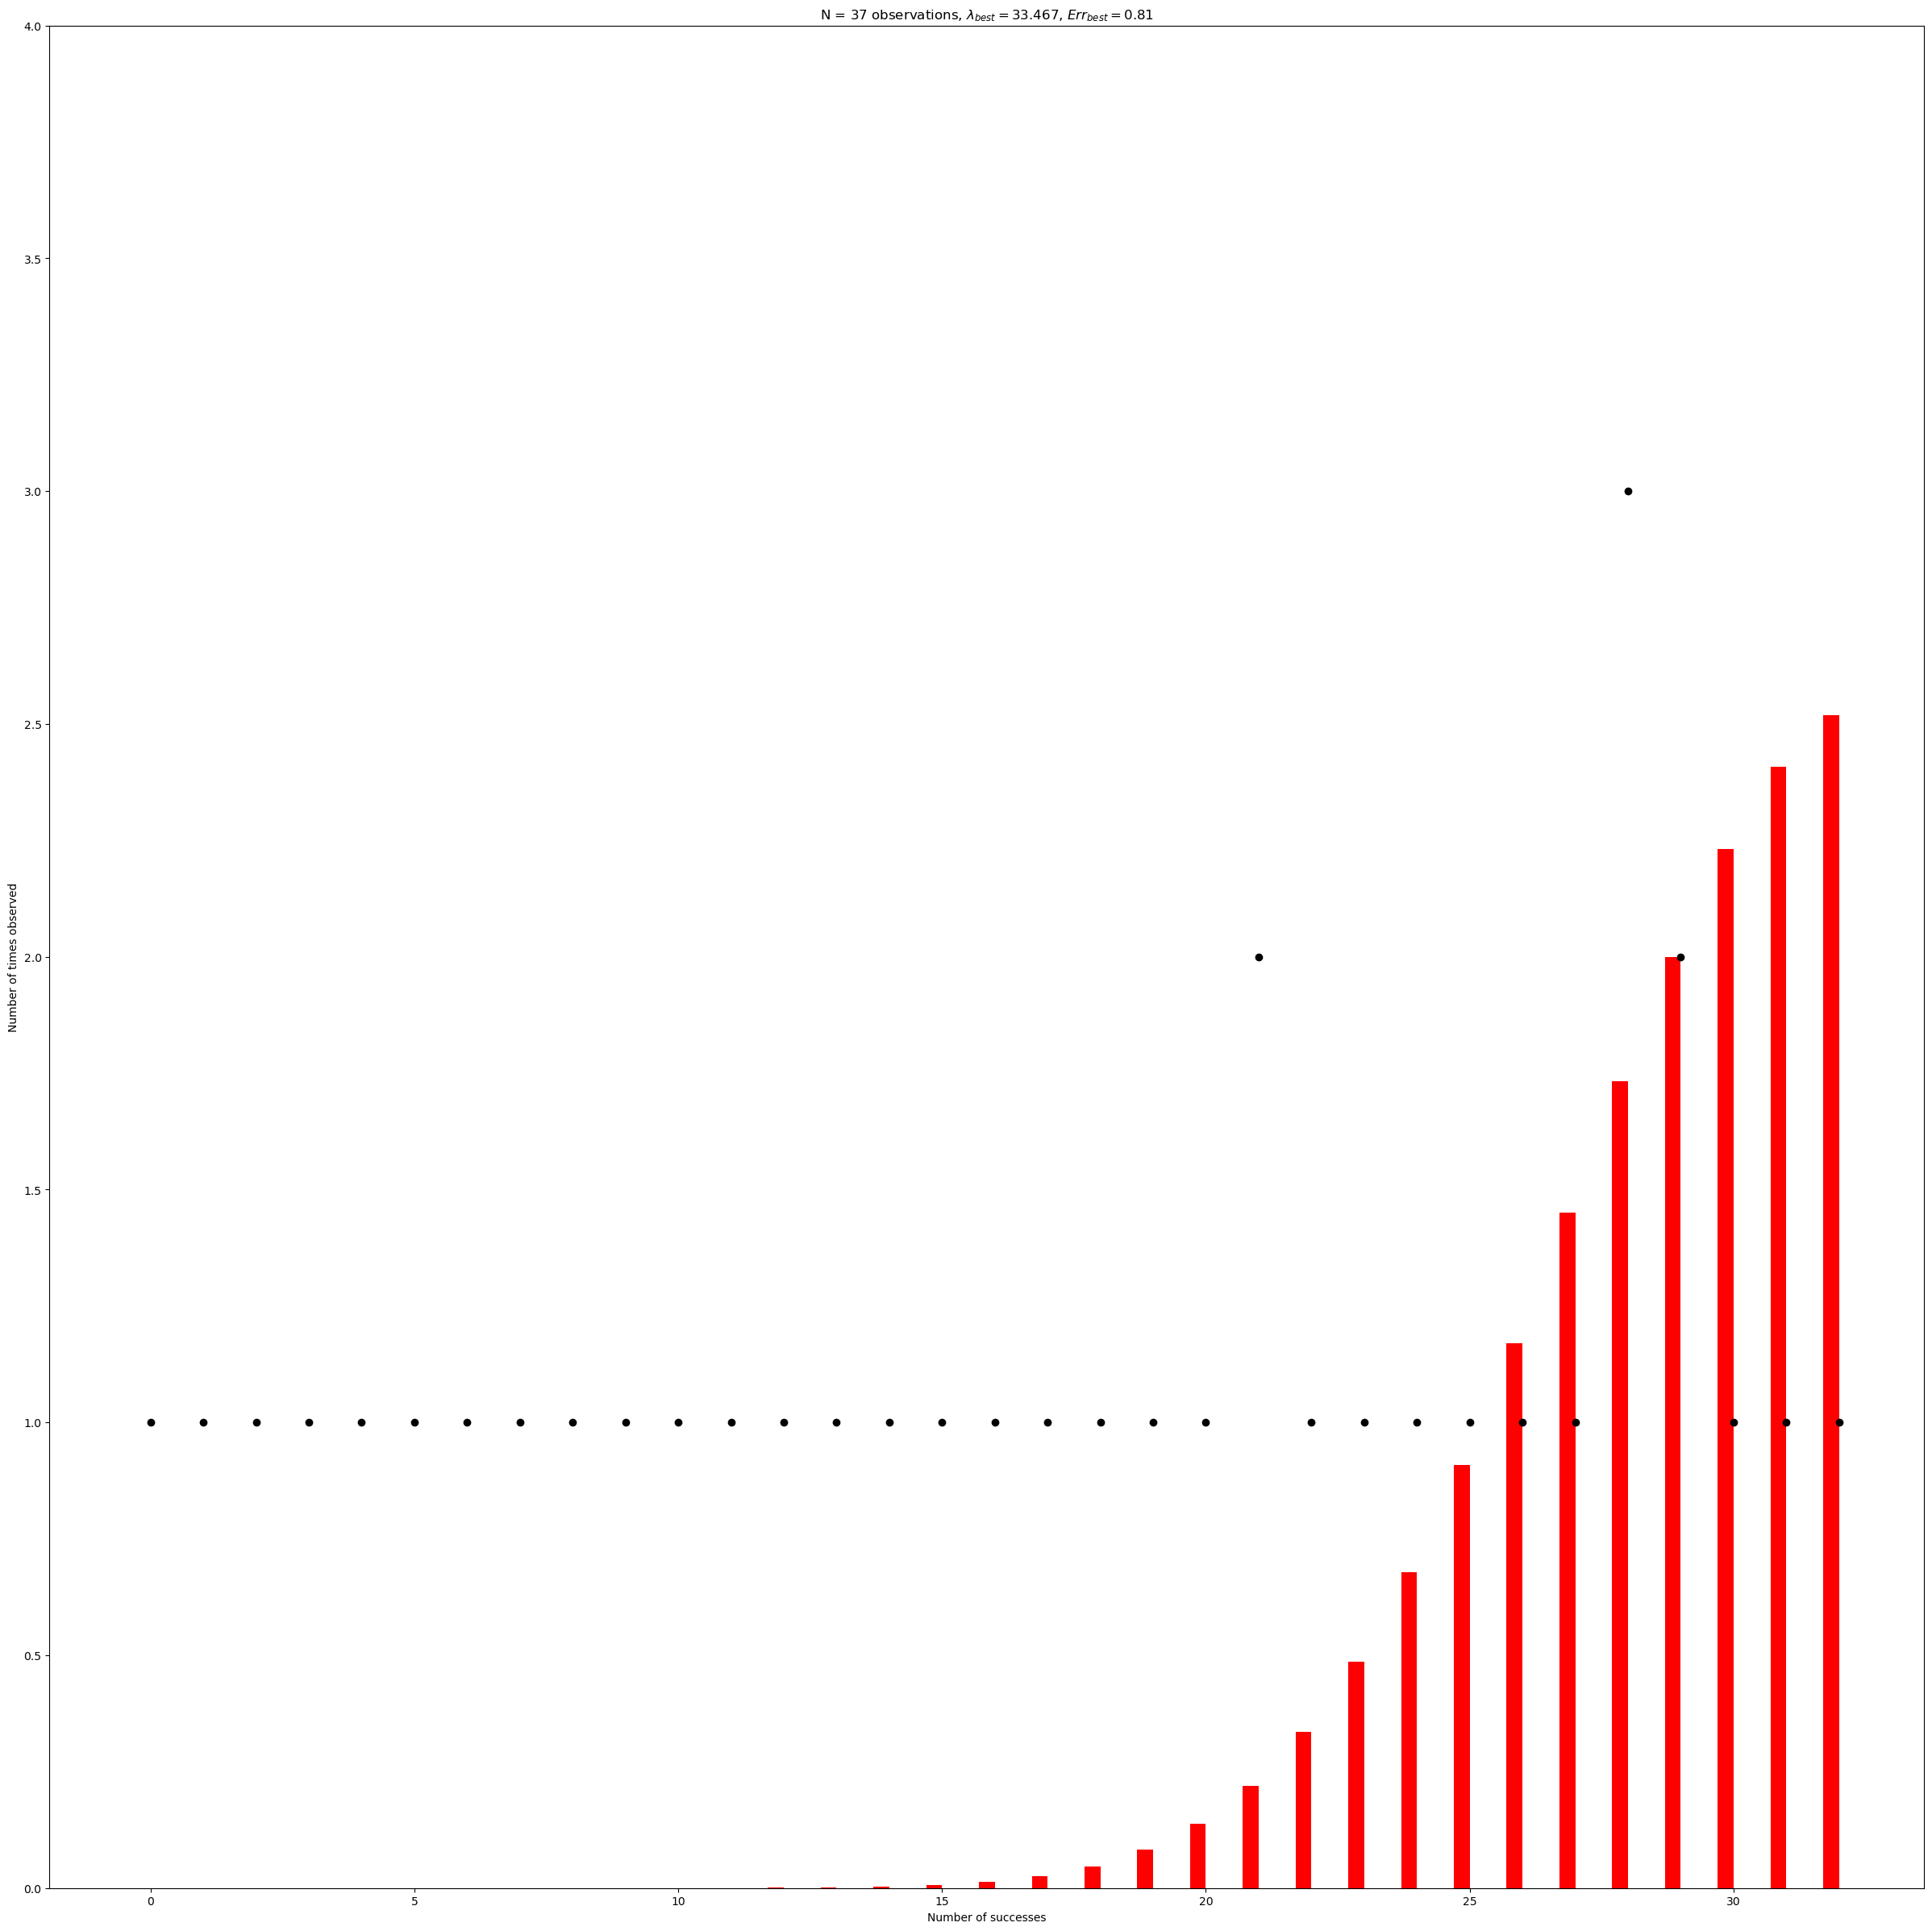

In [235]:
#!/usr/bin/env python

"""
This script creates an animation showing how
a distribution can be fit to a data.

First, we simulate or load a data set.  Then we
compare the data to poisson distributions with
a range of success probabilities.
"""

from scipy import floor, cumsum, array, linspace, cos, pi, rand, loadtxt
from scipy.stats import poisson
from scipy.optimize import fminbound
from matplotlib.pyplot import *
import time

def norm(x,e):
    return sum(abs(x)**e)**(1./e)

def rndBinomial(p, n, replicas=1):
    if replicas == 1:
        return int(sum(floor(rand(n) + p)))
    trials = [ rndBinomial(p,n) for i in xrange(replicas)]
    return trials

def main():
    # load data
    datafile='Florida_hurricanes.csv'
    data = loadtxt(datafile,delimiter=',')
    x, y = map(array, zip(*data))
    N = int(sum(y))

    Y = y*1./N
    X = np.arange(len(x))
    print(X)
    
    
    Y = y*1./N
    
    # distribution fitting
    def fit_error(L_guess):
        # calculate the distance between our guess and the data
        z = poisson.pmf(X, L_guess)
        return norm(Y-z, 1)/norm(Y,1) # can be any p-norm
    L_best = fminbound(fit_error, 1e-5, 50-1e-5)
    err_best = fit_error(L_best)
    print("Best fit: L = %f,  error = %f"%(L_best, fit_error(L_best)))

    # generate data for animation
    #F = [ (p, fit_error(p)) for p in np.linspace(1e-4,3-1e-4, 50) ]
    #u, v = map(array, zip(*F))


    # draw basic figure
    fig = figure(figsize=(30,30))
    
    plot(X, y, 'ko')
    z = poisson.pmf(X, L_best)
    width = .3
    xw = X-width*.5
    bar_ob = bar(xw, z*N, width, color='r')
       
    #ax.bar(xw, z*N, 1, color='r')
    ttl = 'N = %d observations, $\lambda_{best} = %.3f$, $Err_{best} = %1.2g$'
    title(ttl%(N, L_best, err_best))
    ylabel('Number of times observed')
    xlabel('Number of successes')
    #xlim(1849,2011)
    ylim(0,4)
    
    show(block=True)
    
    
    

main()

The number of major hurricanes reaching Florida each year between 1850 and 2010 is not Poisson-
distributed

According to the above graph, our best fit is $\lambda = 33.466760$ when minbound = (0,50).
In this case, poisson distribution doesn't fit well in this graph. This graph got two peaks but poisson distribution got only one. 


## 6. In 1975 observations, a subset of Penn State's female students were binned according to their height and asked to stand in order in front of Old Main (see below). Fit these data with a normal distribution.

Bascially, first we load data into our notebook then using example codes provides in the lecture note to fit the normal distribution.

In [15]:
datafile='JoinerFig1.csv'
data = np.loadtxt(datafile,delimiter=',',comments='#')
data

array([[59.,  2.],
       [60.,  5.],
       [61.,  7.],
       [62., 10.],
       [63., 16.],
       [64., 23.],
       [65., 20.],
       [66., 16.],
       [67.,  9.],
       [68.,  6.],
       [69.,  6.],
       [70.,  3.],
       [71.,  1.],
       [72.,  1.]])

In [16]:
x = data[:,0]
y = data[:,1]
m =data.shape[0]
x

array([59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71.,
       72.])

In [17]:
y

array([ 2.,  5.,  7., 10., 16., 23., 20., 16.,  9.,  6.,  6.,  3.,  1.,
        1.])

In [18]:
m

14

The code above is checking whether we are load right data.

C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log
C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log
C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log
C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log


Numerical Parameter fits:  (20234.490861820243, -27295.218461679684)
	Average Log-Likelihood:  nan
Exact Parameter fits:  (64.632, 2.578483275105735)
	Average Log-Likelihood:  2.3661398814042576
	n = :  2.3661398814042576


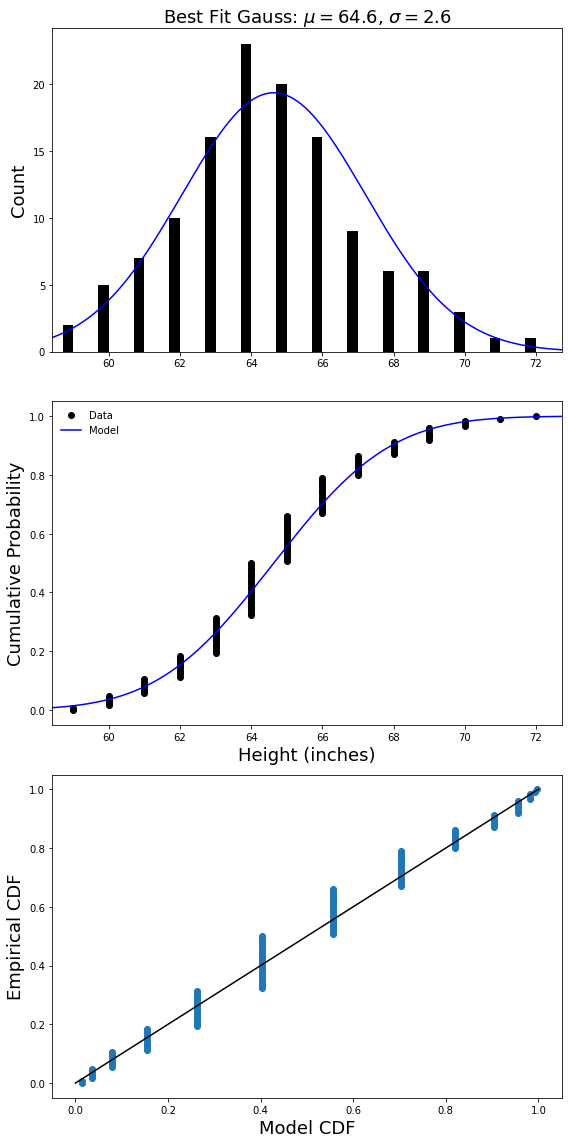

In [19]:
#!/usr/bin/env python3

from numpy import *
from matplotlib.pyplot import *
from scipy import optimize
from scipy.stats import norm as gaussian

def main():
    # Load data
    fname='JoinerFig1.csv'
    data = loadtxt(fname, delimiter=',', comments='#',dtype=int)
    x = data[:,0]
    y = data[:,1]
    m =data.shape[0]

    # Transform from bag to list representation
    z = []
    for i in range(m):
        z += [x[i]]*y[i]
    n = len(z)
    z = array(z)

    # slow, inaccurate method for fitting gaussian to data
    def llikelihood(X):
        a,b = X
        return -sum(log(gaussian.pdf((z-a)/b)/b))
    objective = llikelihood
    result = optimize.minimize(objective, [-100.,100.])
    mu, sigma = result.x
    print("Numerical Parameter fits: ", (mu, sigma))
    print("\tAverage Log-Likelihood: ", llikelihood(result.x)/n)

    # fast, exact method
    mu = sum(z)/float(n)
    sigma = sqrt(sum((z-mu)**2)/n)
    print("Exact Parameter fits: ", (mu,sigma))
    print("\tAverage Log-Likelihood: ", llikelihood((mu,sigma))/n)
    print("\tn = : ", llikelihood((mu,sigma))/n)

    # Plotting
    u = linspace(min(z)*.99,max(z)*1.01, 256)
    figure(1, figsize=(8,16))
    subplot(3,1,1)

    plot(u, n*gaussian.pdf((u-mu)/sigma)/sigma, 'b-')
    width = .3
    bar_ob = bar(x-width*.5, y, width, color='k')
    xlim(min(u), max(u))
    ylabel('Count', fontsize=18)
    title('Best Fit Gauss: $\mu = %.1f$, $\sigma = %.1f$'%(mu,sigma), fontsize=18)

    subplot(3,1,2)
    q = linspace(0,1,n)
    plot(z,q,'ko', label='Data')
    plot(u, gaussian.cdf((u-mu)/sigma),'b-', label='Model')
    xlabel('Height (inches)', fontsize=18)
    ylabel('Cumulative Probability', fontsize=18)
    legend(framealpha=0.0)
    xlim(min(u), max(u))

    subplot(3,1,3)
    plot(gaussian.cdf((z-mu)/sigma), q, 'o', q, q, 'k-')
    xlabel('Model CDF', fontsize=18)
    ylabel('Empirical CDF', fontsize=18)
    tight_layout()
    savefig('height_gaussian.png', bbox_inches='tight', transparent=True)
    savefig('height_gaussian.pdf', bbox_inches='tight')
    show()

main()

In conclusion, you can see our best mean is 64.6 and best std is 2.6 (inch). By looking at plots above, we conclude that our data is under normal distribution.

Particularly, in the third plot "probability plot", it displays a stright line which means a perfect match between teh data's distribution and the model's distribution.

## 7. Exercise 6 in the "Horse kicks and height" lecture gives is a data set for maximum rainfalls in Brussels, Belgium over a 50 year period. Two possible models of this data are the normal distribution (a.k.a. the normal distribution) and Gumbel's distribution. Gumbel's distribution seems the better choice, a priori, because of its frequent use in risk analysis to describe extreme natural events, but we'd like to test this hypothesis ourselves.

In [162]:
datafile = "rainMaxesinBrussels.csv"

data = np.loadtxt(datafile,delimiter=',',comments='#')
data

array([[1934. ,   23.9],
       [1935. ,   37.6],
       [1936. ,   23.8],
       [1937. ,   29.2],
       [1938. ,   33.9],
       [1939. ,   37.7],
       [1940. ,   60.1],
       [1941. ,   30.9],
       [1942. ,   72.1],
       [1943. ,   51.4],
       [1944. ,   24.2],
       [1945. ,   46.9],
       [1946. ,   26.6],
       [1947. ,   29.3],
       [1948. ,   29.5],
       [1949. ,   19.8],
       [1950. ,   39. ],
       [1951. ,   43. ],
       [1952. ,   51.1],
       [1953. ,   39.2],
       [1954. ,   31.7],
       [1955. ,   23. ],
       [1956. ,   34.6],
       [1957. ,   37.7],
       [1958. ,   42.9],
       [1959. ,   30.8],
       [1960. ,   48. ],
       [1961. ,   32.2],
       [1962. ,   58.6],
       [1963. ,   78.3],
       [1964. ,   43. ],
       [1965. ,   48.4],
       [1966. ,   39.3],
       [1967. ,   23.9],
       [1968. ,   26. ],
       [1969. ,   52.9],
       [1970. ,   29.2],
       [1971. ,   45.7],
       [1972. ,   28.6],
       [1973. ,   30. ],


In [163]:
x = data[:,0]
y = data[:,1]
m =data.shape[0]
#x = x - 1934 
x

array([1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942.,
       1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951.,
       1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983.])

In [164]:
y

array([23.9, 37.6, 23.8, 29.2, 33.9, 37.7, 60.1, 30.9, 72.1, 51.4, 24.2,
       46.9, 26.6, 29.3, 29.5, 19.8, 39. , 43. , 51.1, 39.2, 31.7, 23. ,
       34.6, 37.7, 42.9, 30.8, 48. , 32.2, 58.6, 78.3, 43. , 48.4, 39.3,
       23.9, 26. , 52.9, 29.2, 45.7, 28.6, 30. , 30.7, 25.8, 33. , 26.3,
       49.2, 33.6, 38.2, 56.8, 50.1, 24.2])

In [165]:
m

50

(a) Plot the time series.

(b) Plot the empirical cumulative distribution function (CDF) for the maximum daily rainfall.

mu = 38.038000, sigma = 12.787570


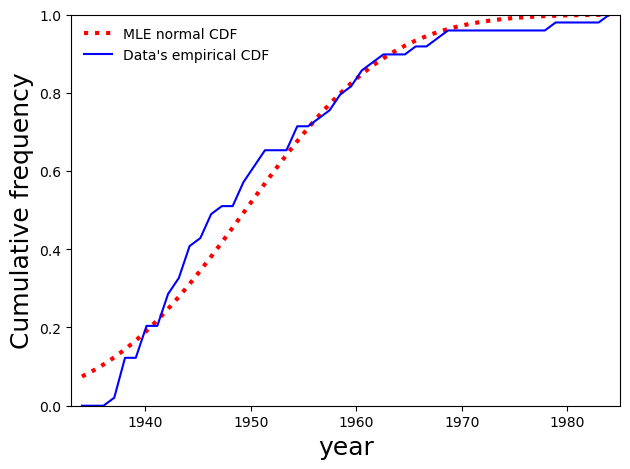

In [166]:
from pylab import *
from scipy.stats import norm as gaussian
from scipy.interpolate import interp1d

x = loadtxt('rainMaxesinBrussels.csv',delimiter=',',comments='#')[:,1:].flatten()
x.sort()
#x = x[1:] # skip over one outlier
#print(x)
n = x.shape[0]
#print(n)
y = array(list(range(n)))/(n-1)
#print(y)
E = interp1d(x,y,kind='previous', fill_value="extrapolate")

mu = sum(x)/n
sigma = sqrt( sum((x-mu)**2)/n )
print('mu = %f, sigma = %f'%(mu,sigma))

figure(1)
t = linspace(1934,1984,50)
u = linspace(min(x)*.99,max(x)*1.01, 50)
plot(t, gaussian.cdf((u-mu)/sigma),'r:', linewidth=3, label='MLE normal CDF')
#u = linspace(min(x)*.99,max(x)*1.01, 5000)
plot(t, E(u), 'b-', label="Data's empirical CDF")
xlim(min(t)-1, max(t)+1)
ylim(0, 1)
xlabel('year', fontsize=18)
ylabel('Cumulative frequency', fontsize=18)
legend(framealpha=0.0)
#title('MLE normal distribution: $\mu = %.4f$,  $\sigma = %.4f$'%(mu, sigma), fontsize=18)
tight_layout()

(c) Find the normal distribution under which the data are most likely.

Exact Parameter fits:  (38.038, 12.787570371262868)
	Average Log-Likelihood:  3.9674121675963363
	n = :  3.9674121675963363


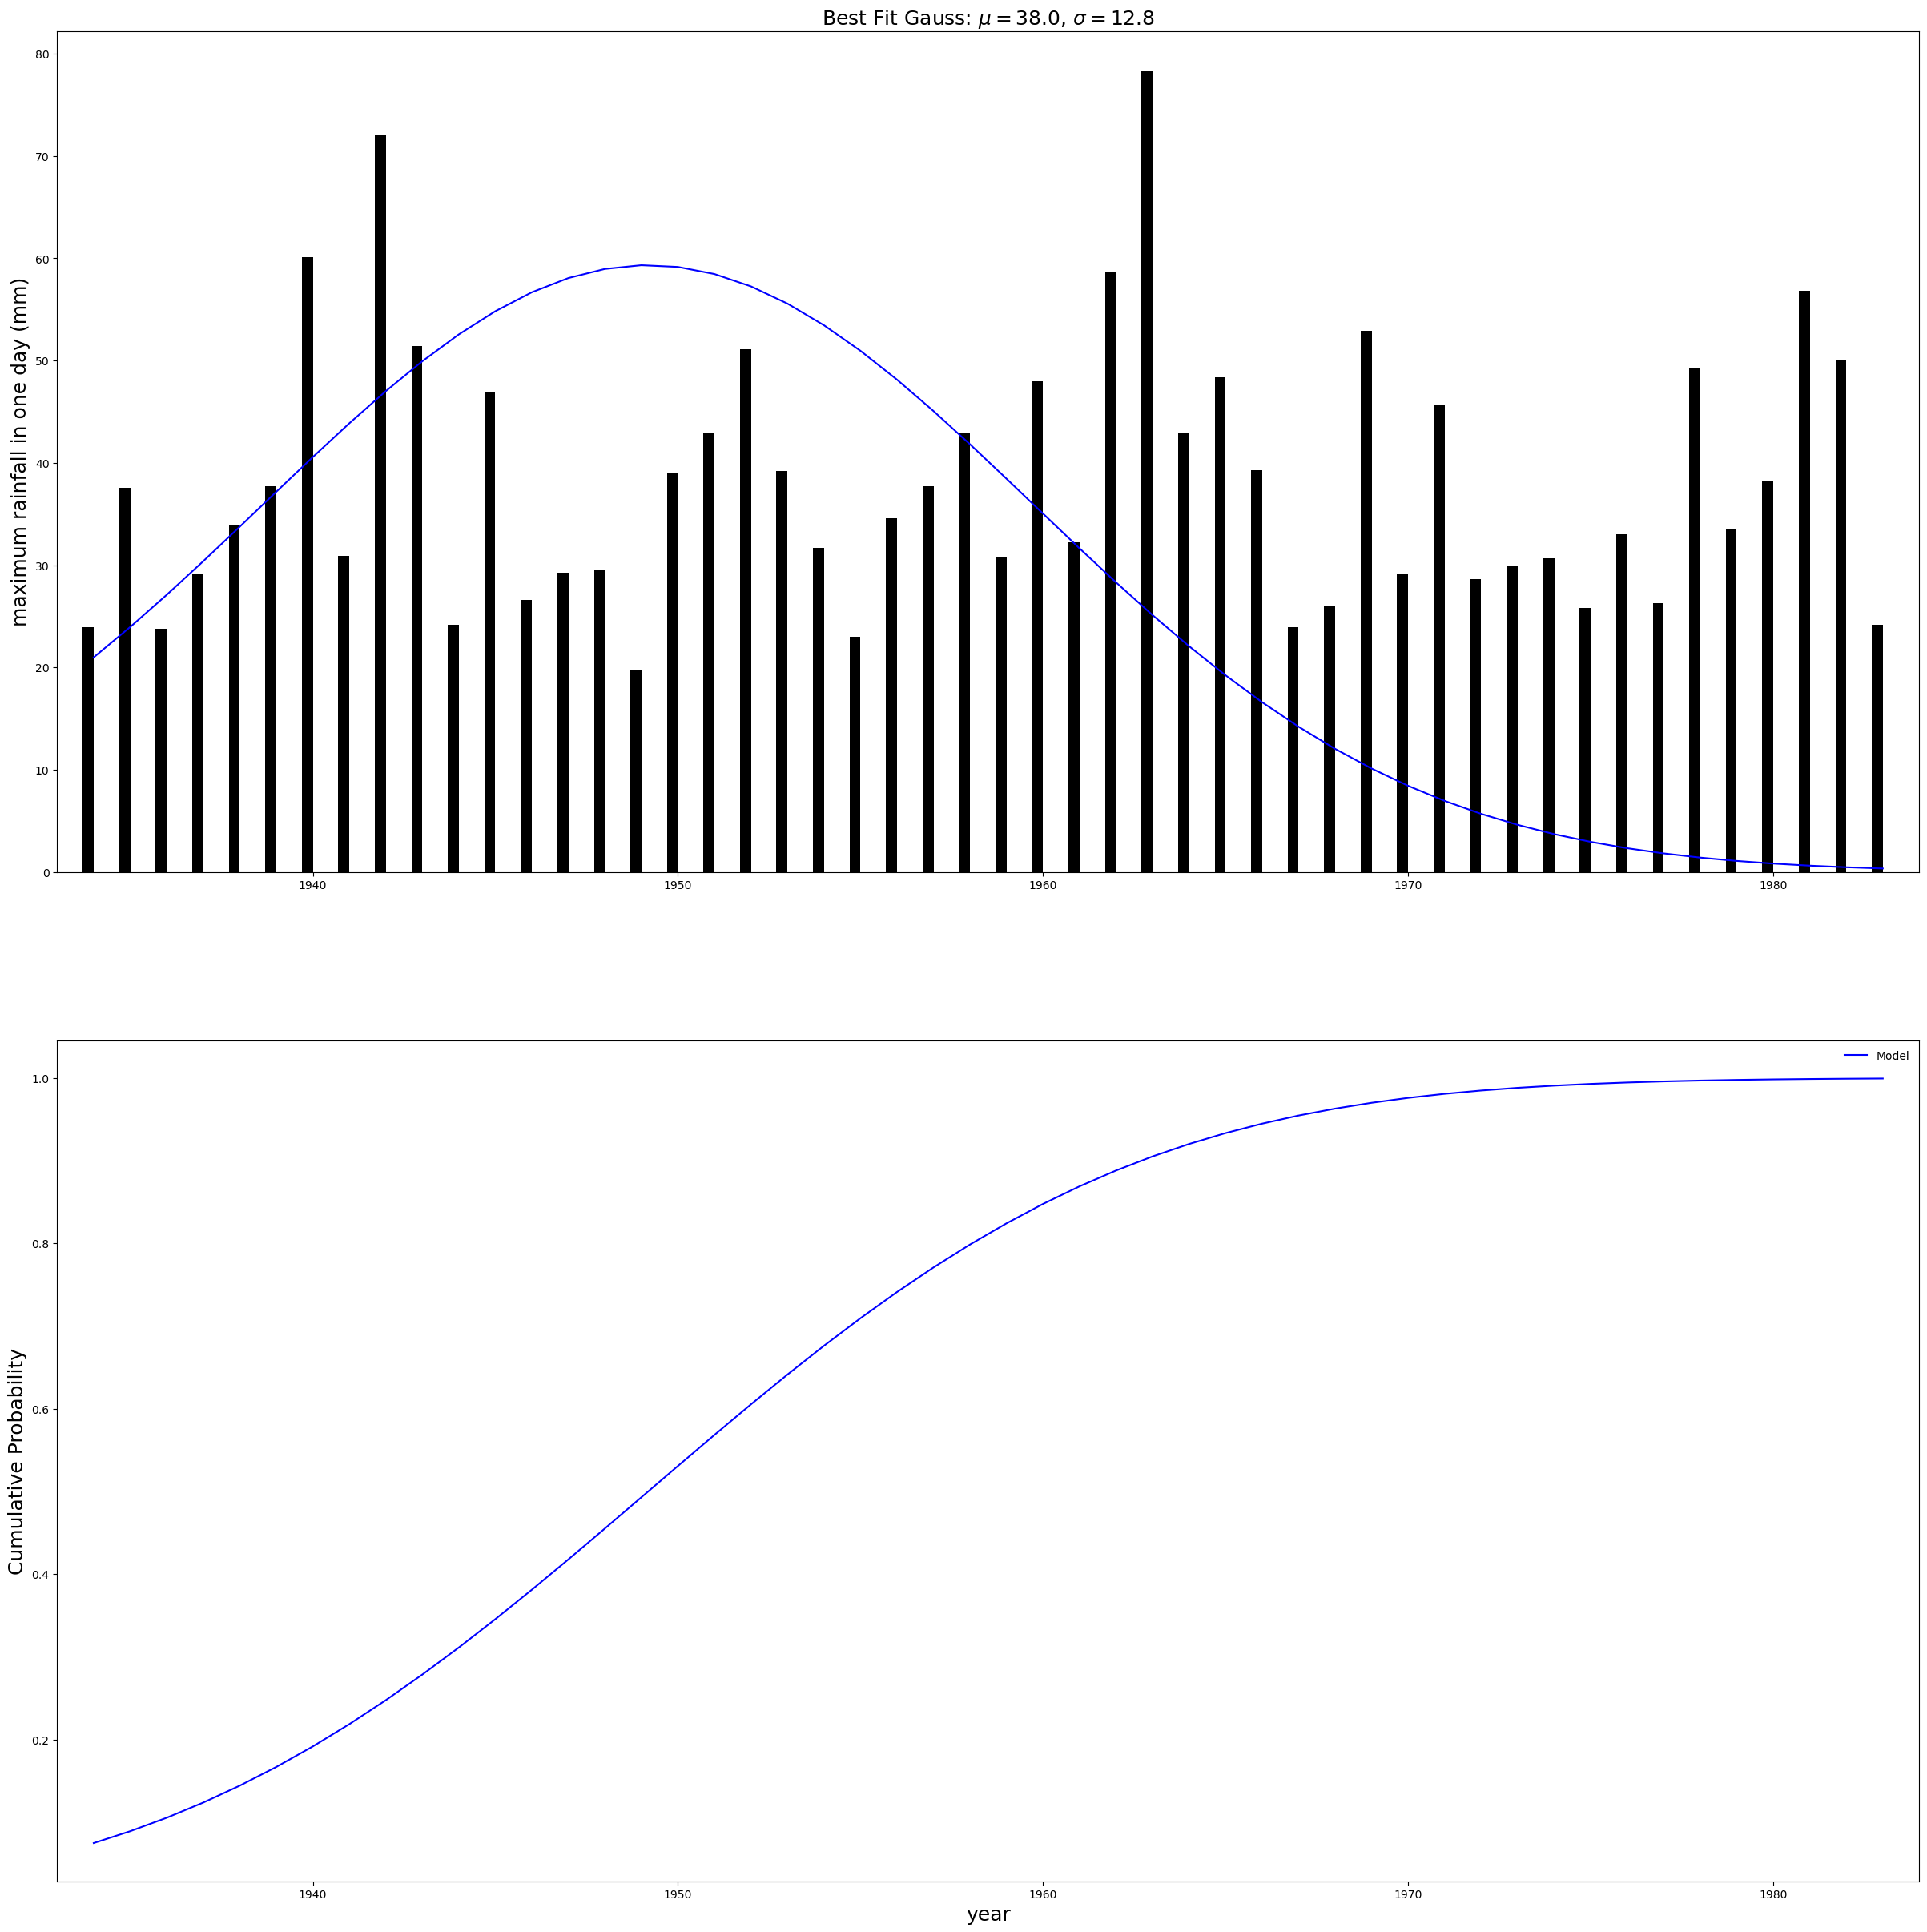

In [167]:
#!/usr/bin/env python3

from numpy import *
from matplotlib.pyplot import *
from scipy import optimize
from scipy.stats import norm as gaussian

def main():
    # Load data
    datafile = "rainMaxesinBrussels.csv"

    data = np.loadtxt(datafile,delimiter=',',comments='#')
    x = data[:,0]
    y = data[:,1]
    m =data.shape[0]
    # Transform from bag to list representation
    z = []
    for i in range(m):
        z += [y[i]]
    n = len(z)
    z = array(z)
    #print(z)
    # slow, inaccurate method for fitting gaussian to data
    def llikelihood(X):
        a,b = X
        return -sum(log(gaussian.pdf((z-a)/b)/b))
    

    # fast, exact method
    mu = sum(z)/float(n)
    sigma = sqrt(sum((z-mu)**2)/n)
    print("Exact Parameter fits: ", (mu,sigma))
    print("\tAverage Log-Likelihood: ", llikelihood((mu,sigma))/n)
    print("\tn = : ", llikelihood((mu,sigma))/n)

    # Plotting
    u = linspace(min(y)*.99,max(y)*1.01, 50)
    #print(u)
    figure(1, figsize=(30,30))
    subplot(2,1,1)
    #print(gaussian.pdf((u-mu)/sigma))
    s = sum(y)
    plot(x, s*gaussian.pdf((u-mu)/sigma)/sigma, 'b-')
    width = .3
    bar_ob = bar(x-width*.5, y, width, color='k')
    xlim(min(x)-1, max(x)+1)
    ylabel('maximum rainfall in one day (mm)', fontsize=18)
    title('Best Fit Gauss: $\mu = %.1f$, $\sigma = %.1f$'%(mu,sigma), fontsize=18)

    subplot(2,1,2)
    
    plot(x, gaussian.cdf((u-mu)/sigma),'b-', label='Model')
    xlabel('year', fontsize=18)
    ylabel('Cumulative Probability', fontsize=18)
    legend(framealpha=0.0)
    xlim(min(x)-1, max(x)+1)

    
    show()

main()

(d) Use numerical minimization to find the form of Gumbel's distribution under which the data are most likely.

(e) Draw the empirical CDF, togethor with the best-fit normal CDF and the best-fit Gumbel CDF together on a single plot. Using this plot, discuss the quality of the distribution fits.

[23.9 37.6 23.8 29.2 33.9 37.7 60.1 30.9 72.1 51.4 24.2 46.9 26.6 29.3
 29.5 19.8 39.  43.  51.1 39.2 31.7 23.  34.6 37.7 42.9 30.8 48.  32.2
 58.6 78.3 43.  48.4 39.3 23.9 26.  52.9 29.2 45.7 28.6 30.  30.7 25.8
 33.  26.3 49.2 33.6 38.2 56.8 50.1 24.2]
output parameter:(loc, scale) = 32.32055309659064, 9.398511994509485
Numerical Parameter fits: (loc, scale) (32.32055309659064, 9.398511994509485)
	Average Log-Likelihood:  3.8488870388541754
[1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945.
 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957.
 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983.]


C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


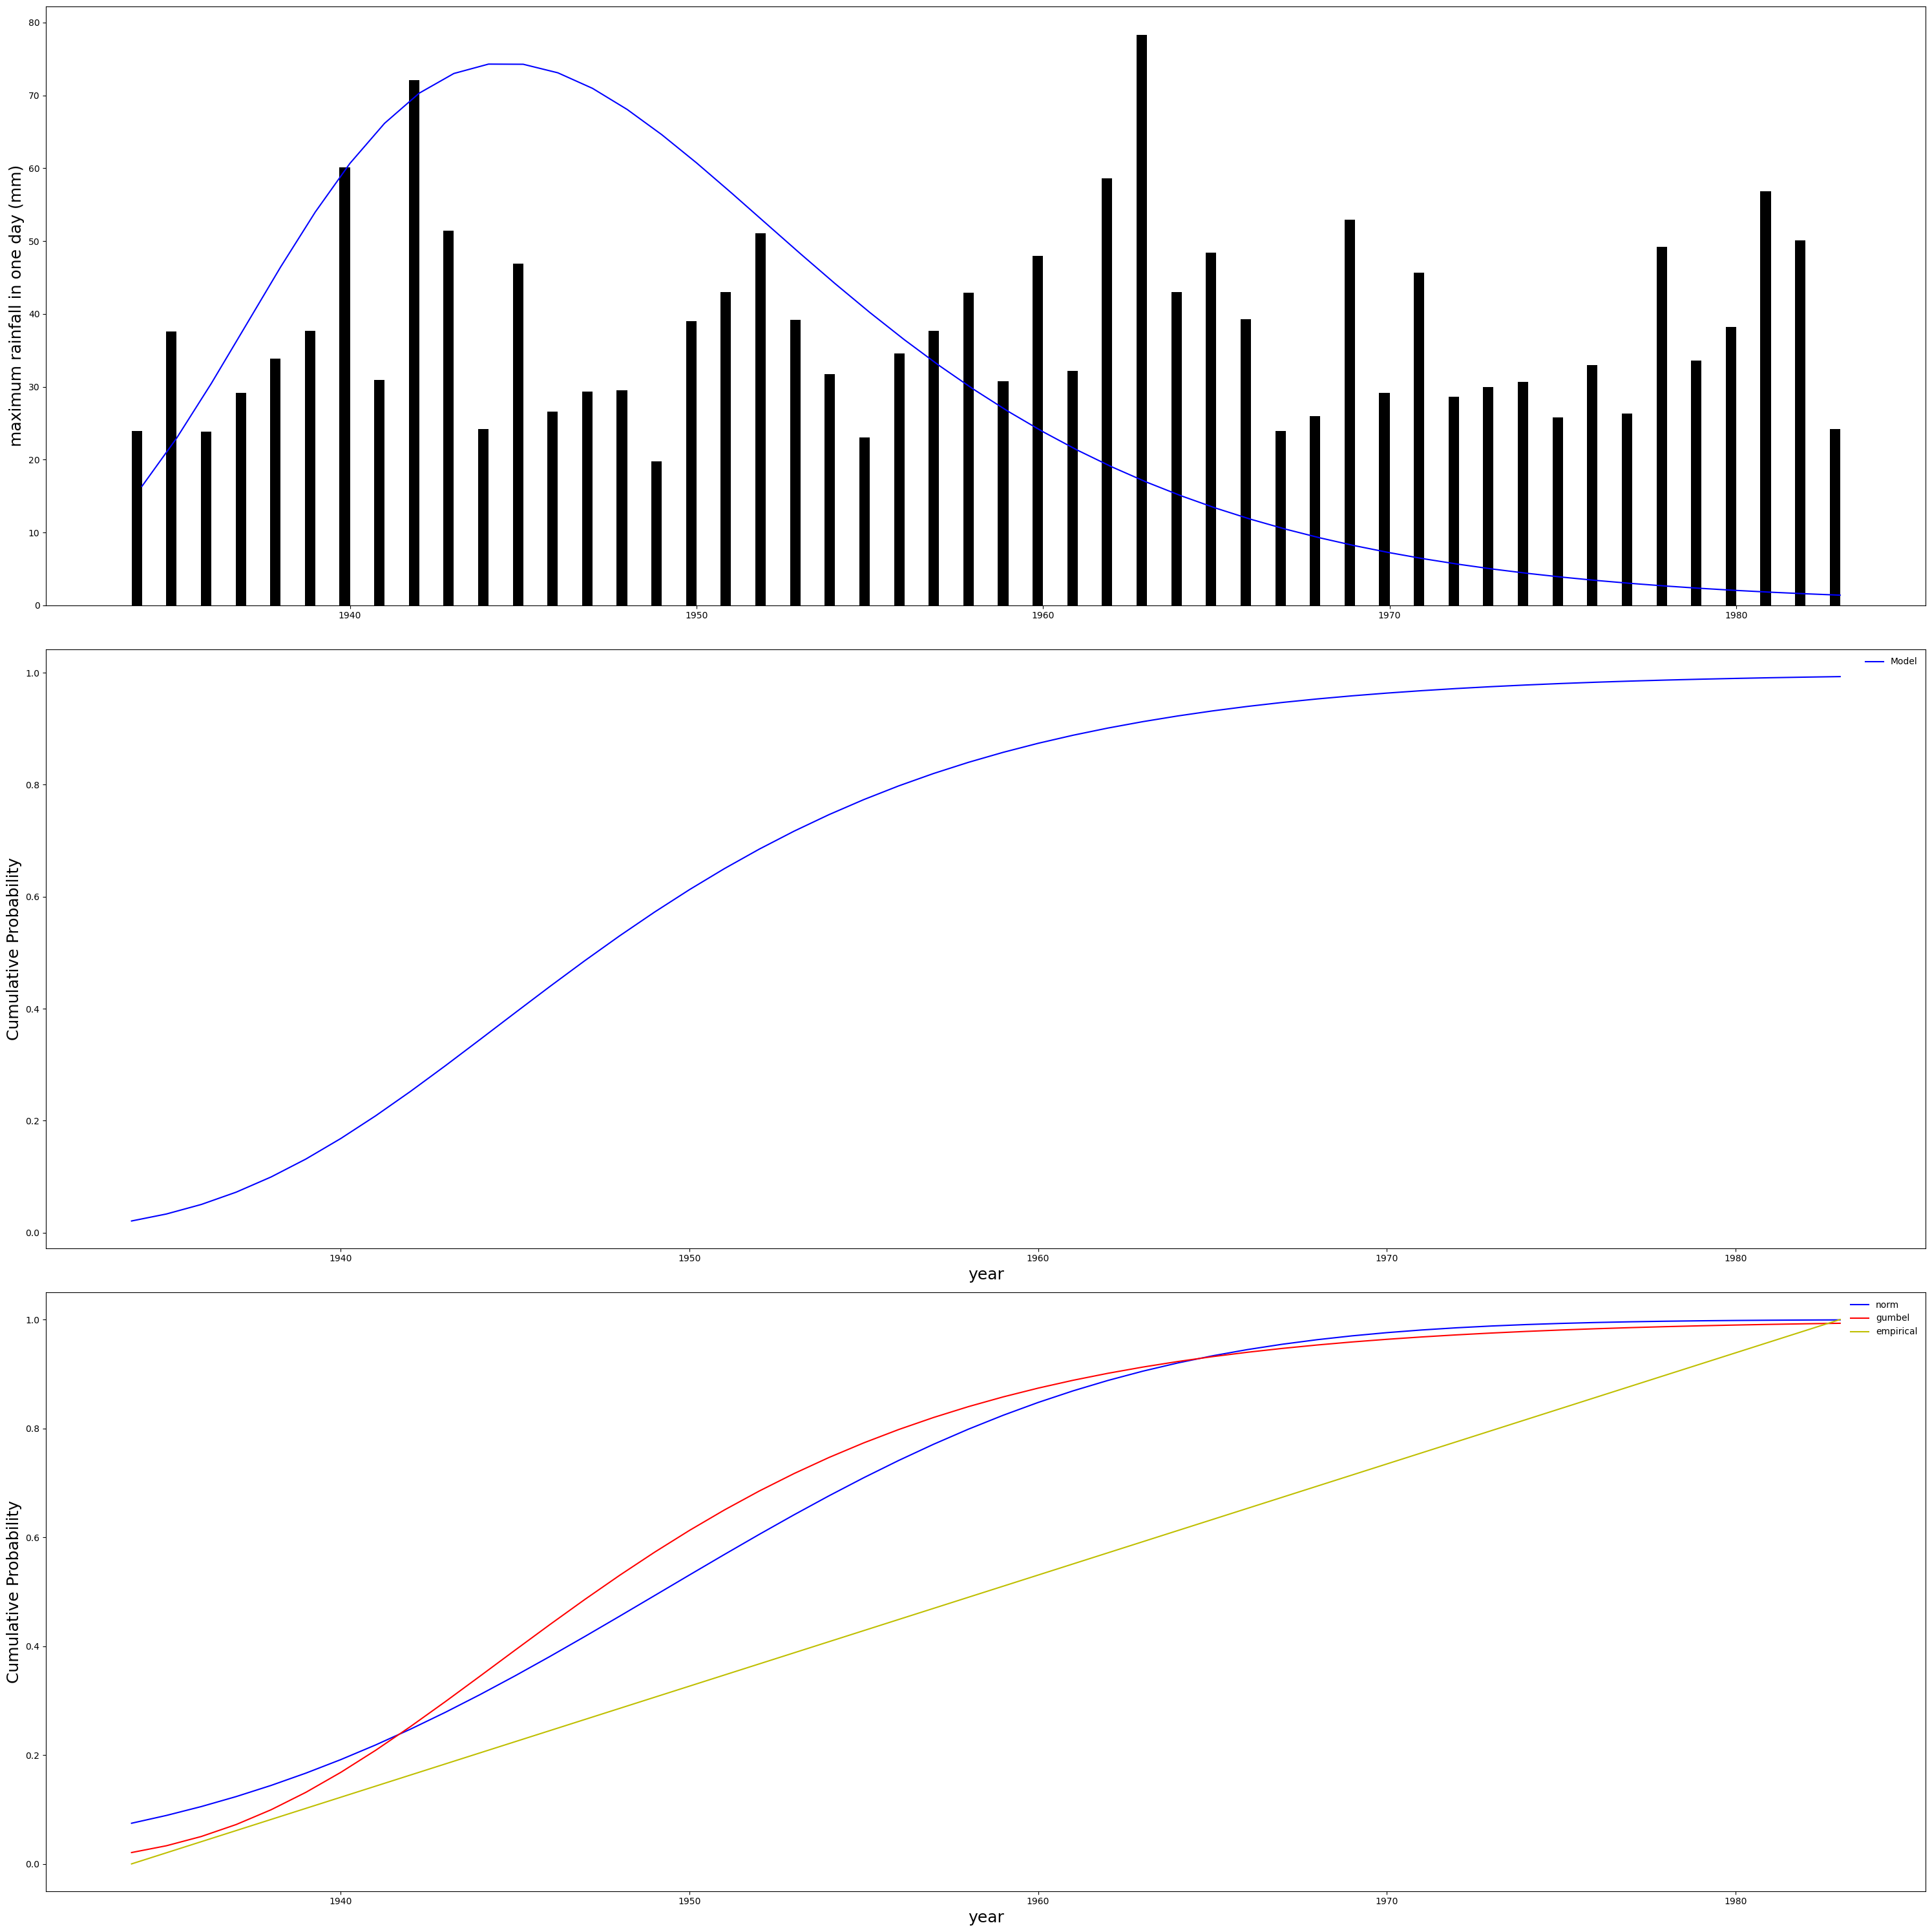

In [204]:
from pylab import *
from scipy.stats import norm as gaussian
from scipy.interpolate import interp1d
from scipy.stats import gumbel_r,gumbel_l

def main():
    x = loadtxt('rainMaxesinBrussels.csv',delimiter=',',comments='#')[:,1:].flatten()
    #x.sort()
    #x = x[1:] # skip over one outlier
    
    n = x.shape[0]
   
    #x = x/sum(x)
    print(x)
    

    
    def glikelihood(X):
        loc,scale = X
        return -sum(log(gumbel_r.pdf(x, loc, scale)))



    # fast, exact method
    #mu = sum(x)/n
    #sigma = sqrt( sum((x-mu)**2)/n )
    #print('mu = %f, sigma = %f'%(mu,sigma))

    # slow, inaccurate method for fitting gaussian to data

    objective = glikelihood
    result = optimize.minimize(objective, [0,1])
   
    loc, scale = result.x
    print(f"output parameter:(loc, scale) = {loc}, {scale}")
    print("Numerical Parameter fits: (loc, scale)", (loc, scale))
    print("\tAverage Log-Likelihood: ", glikelihood(result.x)/n)

    

    #plotting
    figure(1, figsize=(30,30))
    subplot(3,1,1)
    t = linspace(1934,1983,50)
    u = linspace(min(x)*.99,max(x)*1.01, 50)
    '''
    plot(t, gumbel_r.cdf((u-loc)/scale),'r:', linewidth=3, label='MLE gumbel CDF')
    #u = linspace(min(x)*.99,max(x)*1.01, 5000)
    plot(t, E(u), 'b-', label="Data's empirical CDF")
    xlim(min(t)-1, max(t)+1)
    ylim(0, 1)
    xlabel('year', fontsize=18)
    ylabel('Cumulative frequency', fontsize=18)
    legend(framealpha=0.0)
    #title('MLE normal distribution: $\mu = %.4f$,  $\sigma = %.4f$'%(mu, sigma), fontsize=18)
    tight_layout()
    '''
    
    s = sum(x)
    
    plot(t, s*gumbel_r.pdf(u, loc, scale), 'b-')
    width = .3
    bar_ob = bar(t-width*.5, x, width, color='k')
    #xlim(min(t)-1, max(t)+1)
    ylabel('maximum rainfall in one day (mm)', fontsize=18)
    #title('Best Fit Gauss: $\mu = %.1f$, $\sigma = %.1f$'%(mu,sigma), fontsize=18)
    
    subplot(3,1,2)
    t_t = linspace(1934,1983,50)
    print(t_t)
    plot(t_t, gumbel_r.cdf((u-loc)/scale),'b-', label='Model')
    xlabel('year', fontsize=18)
    ylabel('Cumulative Probability', fontsize=18)
    legend(framealpha=0.0)
    #xlim(min(x)-1, max(x)+1)

    subplot(3,1,3)
    q = linspace(0,1,n)
    mu = 38.038
    sigma = 12.787570371262868
    plot(t_t, gaussian.cdf((u-mu)/sigma),'b-', label='norm')
    plot(t_t, gumbel_r.cdf((u-loc)/scale),'r-', label='gumbel')
    plot(t_t, q,'y-', label="empirical")
    xlabel('year', fontsize=18)
    legend(framealpha=0.0)
    ylabel('Cumulative Probability', fontsize=18)
    tight_layout()
    
    
    
    show()
                    
main()


According to the above graph, we can see both best-fit normal distribution and best-fit gumbel distribution are close. For normal distribution, it has better quality between 1942 to 1965 since it's more close to empirical CDF. In other word, gumbel distribution has better quality on the result part of data.

## 8. Suppose a Poisson process is used to describe the pattern of cars passing by Lizzy as she waits to cross a one-way street, with lambda being the frequency of cars per minute. Lizzy needs T seconds to cross the street. Find an expression for how long Lizzy should expect to wait before being able to cross.

According to the lecture, we can get

$\lambda = \frac{\lambda (number\, of\, car)}{minute} * \frac{1 minute}{60s} = \frac{\lambda (number\, of\, car)}{60 s} $

Since we have T seconds, 

The final $\lambda_{T} = \frac{T\lambda (number\, of\, car)}{60s} $


By the information above, we can create exp distribution to describe the time before each car

$$\Longrightarrow f(x) = \lambda_{T}e^{-\lambda_{T} x} \sim EXP(\lambda_{T}) $$


Thus, the mean time of this distribution:

$$\mu = \frac{1}{\lambda_{T}} = \frac{60}{T\lambda}$$

Hence, Lizzy should should wait at least $\frac{60}{T\lambda}$ seconds before being able to cross.

## 9. Here's your chance to do your own version of the meteor model.

a. Use the script from the website (in the Bolides section of the \Shooting stars" lecture (direct link)) to retrieve a data set of dates and times of observations of meteor arrivals.

In [107]:
#!/usr/bin/env python3

import os
import time
import numpy
import json
from urllib.request import urlopen

def retrievedata(firstday, lastday):
    # We can easily program functions to access and
    # retrieve data from the internet these days.
    # This function retrieves data on bolide impacts
    # from JPL.
    #
    # docs at http://ssd-api.jpl.nasa.gov/doc/fireball.html
    #
    baseurl="http://ssd-api.jpl.nasa.gov/fireball.api"
    tags={
        'date-min': firstday,
        'date-max': lastday,
    }
    parameters = '&'.join(['%s=%s'%(i,tags[i]) for i in tags])
    url = baseurl + '?' + parameters
    return json.loads(urlopen(url).read())

def dataclean(result):
    # Convert dates to days since first arrival
    secdata = (1/(60*60*24.))*numpy.fromiter(map(
        lambda s : time.mktime(time.strptime(s[0], '%Y-%m-%d %H:%M:%S')),
        result['data']),dtype=int)
    secdata.sort()
    daydata = secdata - secdata[0] # start days at first arrival
    return daydata

def main():
    firstday, lastday = '1995-01-01', '2006-01-01'
    daydatafile= 'bolideDayData.npy'

    # We test if the data has already been downloaded.  If the data file is
    # wrong, you have to delete it first before a new copy can be downloaded.
    if not os.path.exists(daydatafile):
        daydata = dataclean(retrievedata(firstday, lastday))
        numpy.save(daydatafile,daydata)

    # to load this data into another script, use numpy.load
    A = numpy.load(daydatafile)
    print(A)
    print(A.shape)
    

main()

[0.00000000e+00 2.75357639e+00 1.77781713e+01 1.88384606e+01
 1.99260301e+01 2.71373380e+01 2.88592361e+01 4.90901273e+01
 6.48755440e+01 8.62151505e+01 9.02889352e+01 1.07518449e+02
 1.18388044e+02 1.19475637e+02 1.33063102e+02 1.39800058e+02
 1.49740382e+02 1.88376736e+02 1.88732940e+02 2.12923900e+02
 2.19188947e+02 2.21182812e+02 2.21738183e+02 2.32804363e+02
 2.36920787e+02 2.37484479e+02 2.58522674e+02 2.62092639e+02
 2.67534815e+02 2.72249005e+02 2.73934155e+02 2.79493403e+02
 2.89098993e+02 3.09414062e+02 3.27034097e+02 3.33265058e+02
 3.35049225e+02 3.58266088e+02 3.74187813e+02 3.75354757e+02
 3.79086539e+02 3.83709745e+02 3.90311366e+02 4.23414236e+02
 4.30833287e+02 4.33019630e+02 4.63358704e+02 4.65266713e+02
 4.81480787e+02 4.92934410e+02 4.93417118e+02 5.15630475e+02
 5.16299780e+02 5.19143588e+02 6.22483947e+02 6.37299097e+02
 6.42120648e+02 6.55552303e+02 7.11486447e+02 7.17059734e+02
 7.30939537e+02 7.39831481e+02 7.69137731e+02 7.70290937e+02
 7.71146447e+02 7.723404

In [101]:
A

array([[7.99700000e+01, 5.11424216e+05],
       [7.00700000e+01, 3.44030029e+05],
       [6.01700000e+01, 2.17841207e+05],
       [5.01200000e+01, 1.25902162e+05],
       [4.00700000e+01, 6.43365883e+04],
       [3.00200000e+01, 2.70540360e+04],
       [2.01100000e+01, 8.13272733e+03],
       [1.00500000e+01, 1.01507513e+03],
       [0.00000000e+00, 0.00000000e+00]])

In [103]:
A[0][0]

79.97

b. Make a rank-arrival plot of the data from 1995 to 2005, where the independent variable
is the rank of the arrival time (the rst meteor is rank 1, the second to arrive is 2, . . . )
against the actual arrival time. If that curve is a perfectly straight line, that means the
meteors are arriving at a constant rate with a regular period in between. If the curve
is a little irregular but still mostly straight, that means the time between arrivals has
some randomness, but the average arrival rate is constant. If this plot was more of steps
or a zig-zag, that would mean meteors were arriving in clusters. If the plot is concave
or convex, that would suggest a changing rate of arrival.

In [109]:
A = numpy.load('bolideDayData.npy')

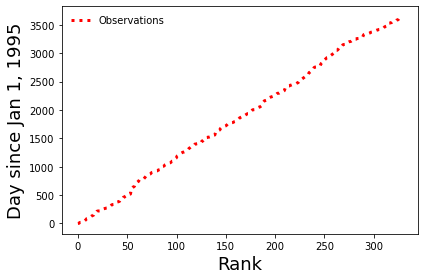

In [110]:
figure(1)
u = linspace(0,A.shape[0]+1,A.shape[0])

plot(u, A,'r:', linewidth=3, label='Observations')
xlabel('Rank', fontsize=18)
ylabel('Day since Jan 1, 1995', fontsize=18)
legend(framealpha=0.0)
#title('MLE normal distribution: $\mu = %.4f$,  $\sigma = %.4f$'%(mu, sigma), fontsize=18)
tight_layout()
show()

By instruction, we can conclude that the time between arrivals has some randomness, but the average arrival rate is constant.

c. Based on the total number of meteor arrivals from 1995 to 2005, what was the average
arrival rate (per day)?

In [113]:
mean_arrival_rate = (A.shape[0])/(A[-1])
print(f"The average arrival rate: {mean_arrival_rate} per day")

The average arrival rate: 0.08975318702709506 per day


d. Plot a histogram of the number of meteors arriving every 45 days over the same 10 years.

In [120]:
print((A.shape[0]//45))

7


In [127]:
new_A = []
start = 0


for i in range((A.shape[0]//45)):
    if i*45 < A.shape[0]:
        
        t = 0
        for j in range(45):
            t += A[i*45+j]
        new_A.append(float(t))

t = 0.0
for k in range(7*45, A.shape[0]):
    t += A[k]
new_A.append(float(t))
        
        
        
print(len(new_A))
new_A
            
    



8


[9455.953344907395,
 34914.26716435183,
 58845.52663194444,
 80755.04393518515,
 103067.51627314814,
 128284.54188657404,
 150350.06614583332,
 42986.405972222215]

In [128]:
#testing correctness of the code
print(sum(new_A))
print(sum(A))
print(sum(new_A) == sum(A))

608659.3213541665
608659.3213541665
True


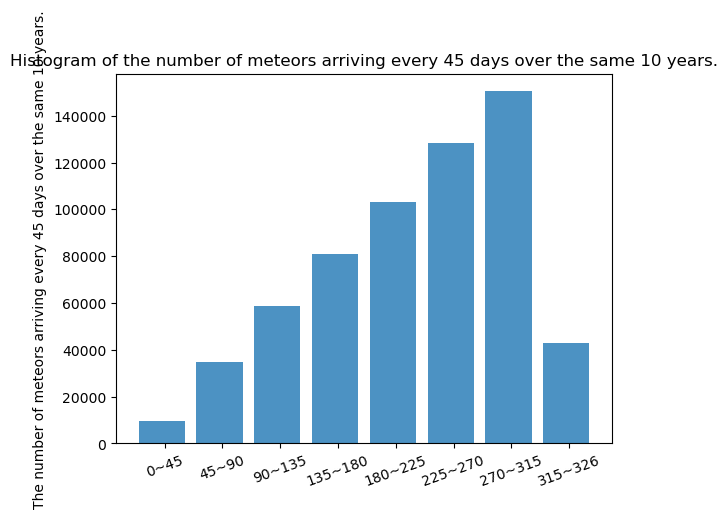

In [151]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

new_x = ['0~45','45~90','90~135','135~180','180~225','225~270','270~315','315~326']
x_pos = np.arange(len(new_x))


plt.bar(x_pos, new_A, align='center', alpha=0.8)
plt.xticks(x_pos+.05,new_x,rotation=20)
plt.ylabel('The number of meteors arriving every 45 days over the same 10 years.')
plt.title('Histogram of the number of meteors arriving every 45 days over the same 10 years.')

plt.show()




e. Fit a Poisson distribution to this histogram and estimate the Poisson distribution's
intensity parameter lambda. Plot your your histogram and your fit Poisson distribution on
top of each other so we can compare them.

[9455.953344907395, 34914.26716435183, 58845.52663194444, 80755.04393518515, 103067.51627314814, 128284.54188657404, 150350.06614583332, 42986.405972222215]
Best fit: L = 4.766363,  error = 0.226896


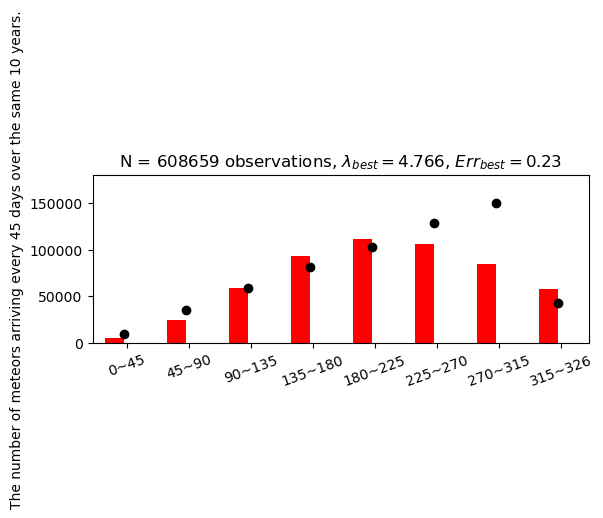

In [161]:
#!/usr/bin/env python

"""
This script creates an animation showing how
a distribution can be fit to a data.

First, we simulate or load a data set.  Then we
compare the data to poisson distributions with
a range of success probabilities.
"""

from scipy import floor, cumsum, array, linspace, cos, pi, rand, loadtxt
from scipy.stats import poisson
from scipy.optimize import fminbound
from matplotlib.pyplot import *
import time

def norm(x,e):
    return sum(abs(x)**e)**(1./e)

def rndBinomial(p, n, replicas=1):
    if replicas == 1:
        return int(sum(floor(rand(n) + p)))
    trials = [ rndBinomial(p,n) for i in xrange(replicas)]
    return trials

def main():
    # load data
    x = x_pos
    y = new_A
    print(y)
    N = sum(y)

    Y = y/N
    # distribution fitting
    def fit_error(L_guess):
        # calculate the distance between our guess and the data
        z = poisson.pmf(x, L_guess)
        return norm(Y-z, 1)/norm(Y,1) # can be any p-norm
    L_best = fminbound(fit_error, 1e-5, 20-1e-5)
    err_best = fit_error(L_best)
    print("Best fit: L = %f,  error = %f"%(L_best, fit_error(L_best)))

    # generate data for animation
    #F = [ (p, fit_error(p)) for p in linspace(1e-4,3-1e-4, 137) ]
    #u, v = map(array, zip(*F))

    # draw basic figure
    fig = figure()

    #subplot(2,1,2)
    #plot(u, v, 'b-')
    #plot( L_best, fit_error(L_best), 'ko')
    #marker_fit_error = plot( u[2], v[2], 'ro').pop()
    #ylim(0,1)
    #xlabel('Poisson intensity $\lambda$')

    subplot(2,1,1)
    plot(x, y, 'ko')
    z = poisson.pmf(x, L_best)
    width = .3
    xw = x-width*.5
    bar_ob = bar(xw, z*N, width, color='r')
    ttl = 'N = %d observations, $\lambda_{best} = %.3f$, $Err_{best} = %1.2g$'
    title(ttl%(N, L_best, err_best))
    ylabel('The number of meteors arriving every 45 days over the same 10 years.')
    xticks(x_pos+.05,new_x,rotation=20)
    xlim(-0.5,max(x)+.5)
    ylim(0,max(y)*1.2)

    show(block=False)

    

main()

According to the graph, the black dot is the data we got from #d, the red bar is the fit Poisson Distribution. In this case, the best lambda for poisson distribution is 4.766 per 45 days. The smallest error is 0.23

f. If the meteors are really arriving according to a Poisson process, the times between meteor arrivals should be exponentially distributed. Are they?

Yes, according to our lecture, if we are assume the meteors are really arriving according to a Poisson process. The times between meteor arrivals should be exponentially distributed.

Find reference from google (see reference #6 and #7)


Reference

1. https://docs.latexbase.com/symbols/infinity/
2. https://www.derivative-calculator.net/
3. https://www.coursehero.com/
4. https://stats.stackexchange.com/questions/55493/what-is-an-hypergeometric-distribution-where-the-last-event-is-success
5. https://stats.stackexchange.com/questions/351144/maximum-likelihood-and-gumbel-distribution-does-the-likelihood-have-a-global-ma
6. https://stats.stackexchange.com/questions/2092/relationship-between-poisson-and-exponential-distribution
7. https://www.kellogg.northwestern.edu/faculty/weber/decs-430/Notes%20on%20the%20Poisson%20and%20exponential%20distributions.pdf

Collaborator with Rui Wang